<a href="https://colab.research.google.com/github/ShivamAmin05/HarrisCornerDetector/blob/main/Harris_Corner_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

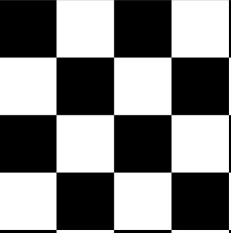

(233, 231)


In [ ]:
#The image we're going to use for showing the corner detection
org_img = cv2.imread('/content/checkerboard.png')
img_gray = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)
print(img_gray.shape)

Shape: (115, 116)


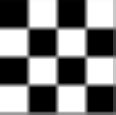




Shape: (58, 57)


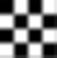




Shape: (28, 29)





Shape: (14, 14)


In [ ]:

def step_of_gaussian_pyramid(img):
  target_shape = (img.shape[0] // 2, img.shape[1] // 2)
  resized_img = cv2.resize(img, target_shape) #Scale down to half size
  blurred_img = cv2.GaussianBlur(resized_img,(5,5),10) #Blur
  return blurred_img

imgs = []
steps = 4

for _ in range(steps):
  img_gray = step_of_gaussian_pyramid(img_gray)
  imgs.append(img_gray)

for i in imgs:
  print(f"Shape: {i.shape}")
  cv2_imshow(i)
  print("\n\n")

In [ ]:
#Hardcoded implementation of convolving 3x3 kernels

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

def apply_convolutions(img_gray, kernel):
    # Create an empty array to store the convolved image
    convolved = np.zeros_like(img_gray)

    # Loop through the image, excluding the borders
    for y in range(1, img_gray.shape[0] - 1):
        for x in range(1, img_gray.shape[1] - 1):
            # Extract 3x3 patch centered at (x, y)
            patch = img_gray[y-1:y+2, x-1:x+2]

            # Compute the convolution by summing together the result of multiplication
            # of elements in patch and kernel, represents intensity of the shift at a position
            convolved[y, x] = np.sum(patch * kernel)

    return np.array(convolved)


In [ ]:

sobel_x = np.array([[-1,  0,  1],   # This kernel detects horizontal edges
                    [-2,  0,  2],   # by emphasizing the difference
                    [-1,  0,  1]])  # between pixels on the left and right sides

sobel_y = np.array([[-1, -2, -1],   # This kernel detects vertical edges
                    [ 0,  0,  0],   # by emphasizing the difference
                    [ 1,  2,  1]])  # between pixels above and below the center

Ix = apply_convolutions(img_gray, sobel_x)
Iy = apply_convolutions(img_gray, sobel_y)


# Finds (Ix)^2,(Iy)^2, and Ixy
Ix2 = Ix ** 2
Iy2 = Iy ** 2
Ixy = Ix * Iy

print('horizontal gradient:')
cv2_imshow(Ix)
print('vertical gradient:')
cv2_imshow(Iy)
print('squared horizontal:')
cv2_imshow(Ix2)
print('squared vertical:')
cv2_imshow(Iy2)
print('gradient both directions:')
cv2_imshow(Ixy)

horizontal gradient:


vertical gradient:


squared horizontal:


squared vertical:


gradient both directions:


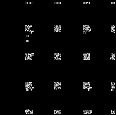

(115, 116)


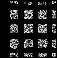

(58, 57)


(28, 29)


(14, 14)


In [ ]:
#Doing that for each level of gaussian pyramid
Ixys = []
Ix2 = []
Iy2 = []
for i in imgs:

  Ix = apply_convolutions(i, sobel_x)
  Iy = apply_convolutions(i, sobel_y)

  Ix2.append(Ix ** 2)
  Iy2.append(Iy ** 2)
  Ixy = Ix * Iy
  Ixys.append(Ixy)

for ixy in Ixys:
  cv2_imshow(ixy)
  print(ixy.shape)

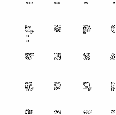

(115, 116)


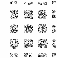

(58, 57)


(28, 29)


(14, 14)


In [ ]:
#Doing that to the Ix and Iy
Rs = []

K = 0.004

for ixy, ix2, iy2 in zip(Ixys, Ix2, Iy2):
  det = (ix2 * iy2) - (ixy ** 2)
  trace = ix2 + iy2
  R = det - (K * (trace ** 2))
  Rs.append(R)

for r in Rs:
  r = cv2.normalize(r, None, 0, 255, cv2.NORM_MINMAX)
  cv2_imshow(r)
  print(r.shape)

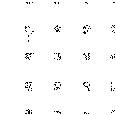

(115, 116)


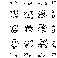

(58, 57)


(28, 29)


(14, 14)


In [ ]:
#Getting the final corners
corners = []
threshhold = 100
for R in Rs:
  norm = cv2.normalize(R, None, 0, 255, cv2.NORM_MINMAX)
  corners_arr = np.zeros_like(norm)
  corners_arr[norm > threshhold] = 255
  corners.append(corners_arr)
  cv2_imshow(corners_arr)
  print(corners_arr.shape)

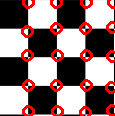

In [ ]:
from sklearn.cluster import KMeans

# Resize the original image to half its size
resized_image = cv2.resize(org_img, (org_img.shape[1] // 2, org_img.shape[0] // 2))

# Stored the locations of all the corners
corner_indices = np.where(corners[0] == 0)

# Finds major groups of corners using Kmeans clustering
points = np.array(list(zip(corner_indices[1], corner_indices[0])))
kmeans = KMeans(n_clusters=20, n_init='auto') # Determines how many corners will be plotted
kmeans.fit(points)

# Draws a red circle at every cluter
for center in kmeans.cluster_centers_:
  cv2.circle(resized_image, (int(center[0]), int(center[1])), 5, (0, 0, 255), 2)

cv2_imshow(resized_image)

